# Small project

We have now seen a large part of Python and some tools that are available, and even if there is much much more to learn we have enough knowledge by now to do a small project together.

In this course you have been learning how to use an Arduino to collect sensor data and you have distributed this data with the help of Raspberry Pis. It is now time to look at and analyze the data. We will be using the same tools that we have looked at this week. There will be some minimal data science to just have some new results to look at. Do not let this alarm you, you do not need to understand it, you just need to pay attention to how we visualize it. 

<img src="img/sensors.jpg" style="width:500px">

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.decomposition import PCA

%matplotlib inline

You have recieved a data set from your project where you have taken readings from three different types of objects and summarized this in a data file located at "data/iris.data". Lets start by loading this file using Pandas. The data file in CSV (comma separated values) format which we can easily load through Pandas using `pd.read_csv` that returns a new `DataFrame` with the data.

In [20]:
data = pd.read_csv("data/iris.data")
data.shape

(150, 5)

Using `Dataframe.head` we can inspect the first rows of the dataset to get an idea of what is in it.

In [17]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


`Dataframe.describe` can give us some more detailed information about the columns:

In [19]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This information can be nice to visualize. `DataFrame`s have the convenient `hist` method that will plot them for us.

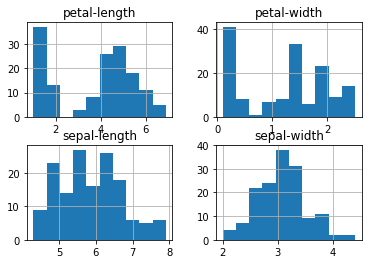

In [34]:
data.hist()
plt.show()

We can also group the information in a `DataFrame`. In this case it would be convenient to group by class and see a summary of the columns per class. For this we can use the `DataFrame.groupby` method.

In [31]:
data.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [39]:
data.groupby("class").describe(percentiles=[])

sepal-length                                 sepal-width  \
                       count   mean       std  min  50%  max       count   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  5.0  5.8        50.0   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.9  7.0        50.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.5  7.9        50.0   

                                       ... petal-length                  \
                  mean       std  min  ...          std  min   50%  max   
class                                  ...                                
Iris-setosa      3.418  0.381024  2.3  ...     0.173511  1.0  1.50  1.9   
Iris-versicolor  2.770  0.313798  2.0  ...     0.469911  3.0  4.35  5.1   
Iris-virginica   2.974  0.322497  2.2  ...     0.551895  4.5  5.55  6.9   

                petal-width                                  
                      count   mean       std  min  50%  max  
class                                                        
Iris-setosa            50.0  0.244  0.107210  0.1  0.2  0.6  
Iris-versicolor        50.0  1.326  0.197753  1.0  1.3  1.8  
Iris-virginica         50.0  2.026  0.274650  1.4  2.0  2.5  

[3 rows x 24 columns]

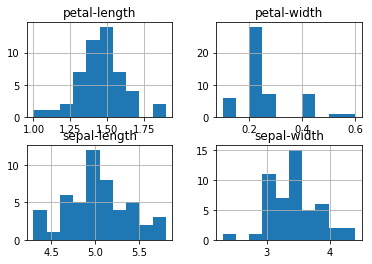

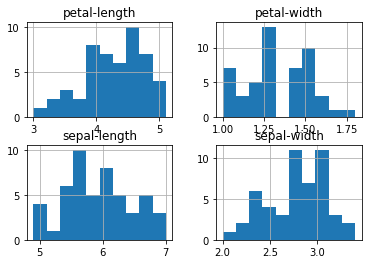

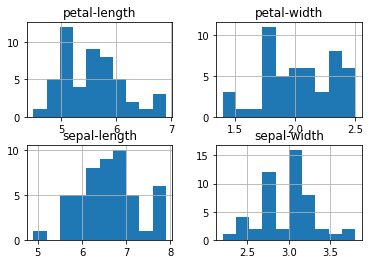

In [25]:
data.groupby("class").hist()
plt.show()

We might also want to visualize the whole dataset using a scatter plot for example.

There are four different dimensions (columns) which we would need to reduce the number of dimensions. Here we will use a technique called *PCA* to reduce from four dimensions to three dimensions by calculating the dimensions that have the highest variance, and then we plot the dataset over them.

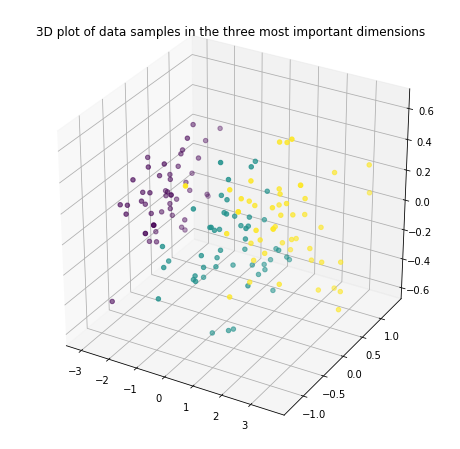

In [75]:
data_reduced = PCA(n_components=3).fit_transform(data.iloc[:, :3])

classes = data.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}).iloc[:, 4]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title("3D plot of data samples in the three most important dimensions")

p = ax.scatter(data_reduced[:, 0], data_reduced[:, 1], data_reduced[:, 2], c=classes)

plt.show()

If I would make a guess for the two most significant dimensions I would choose petal width and petal length. Lets make a 2D plot of the samples over these two dimensions.

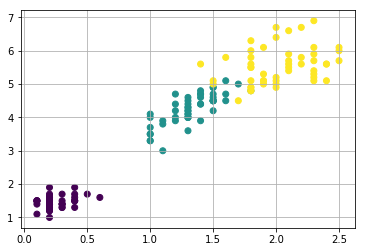

In [70]:
fig, ax = plt.subplots()
ax.scatter(data["petal-width"], data["petal-length"], c=classes)
ax.grid(True)
plt.show()

## Bonus: predict class of the samples

Lets do a small bonus step and try to create a model that can predict the class from values for the sepal and petal dimensions. For this part we will be using [scikit-learn](https://scikit-learn.org/stable/index.html), which is a great machine learning library.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

First step in creating a model is to separate your data in input and output. In our case input is sepal length, sepal height, petal length and petal width. Our output is the class.

In [60]:
X = data.iloc[:, :4] # INPUT: four first columns
y = classes          # OUTPUT: the converted version of name to an int

Then we need to split our data into something to fit the model to, and a set that we later use to test on. We will make the test set a third of our original data. The `sklearn.model_selection` module has a very handy function `train_test_split` for this.

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3)

Then we create a model that we want to use to classify the values it recieves. There are many different algorithms for classification problems. Here we have chosen to use *Random Forest*.

In [64]:
rf = RandomForestClassifier(n_estimators=10) # create a new classifier

Then we fit our model to the training set.

In [66]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Lets then double check how well it performs on the test set.

In [67]:
rf.score(Xtest, ytest) # gives us the accuracy of our model

0.9777777777777777

Almost 98%, not bad!

We can also get the importance of each feature from the classifier.

In [82]:
rf.feature_importances_

array([0.02652239, 0.01671349, 0.55795455, 0.39880957])

And we can visualize it with the following. 

(There is some magic here and there, but try and see if you understand it)

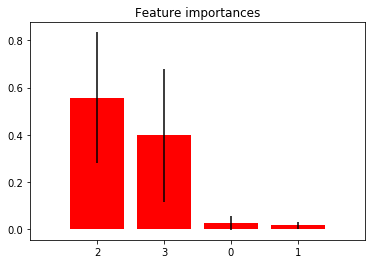

In [86]:
# sort the feature importances.
# np.argsort gives the order of the indices for the values sorted in ascending order.
# the last [::-1] reverses the order so we get descending order.
indices = np.argsort(rf.feature_importances_)[::-1]

# calculate the standard deviation for each importance
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# make bar plots of the feature importances and show the standard deviation as well
fig, ax = plt.subplots()
ax.set_title("Feature importances")
ax.bar(range(4), rf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
ax.set_xticks(range(4))
ax.set_xticklabels(indices)
ax.set_xlim((-1, 4))

plt.show()

As we can see the petal length and the petal width are by far the most important features to tell which class a sample belongs to.